In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
from thefuzz import process, fuzz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go

from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report

In [4]:
test_data = pd.read_csv("../predict-full-data/data/prediction_out_full_testdata_nonmhc.csv")
test_data

In [ ]:
test_data = test_data.drop_duplicates(subset=['CDR3b', 'epitope'])
unique_epitope = test_data['epitope'].unique().tolist()

score_sort_epitope = [(x,) + i
                     for x in unique_epitope 
                     for i in process.extract(x, unique_epitope, scorer=fuzz.token_sort_ratio)]

similarity_sort = pd.DataFrame(score_sort_epitope, columns=['epitope','match_sort','score_sort'])
similarity_sort['sorted_epitope_sort'] = np.minimum(similarity_sort['epitope'], similarity_sort['match_sort'])        

In [ ]:
high_score_sort_50_55 = similarity_sort[(similarity_sort['score_sort'] > 50) & 
                                        (similarity_sort['score_sort'] <= 55) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]
     
high_score_sort_50_55 = high_score_sort_50_55.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_50_55 = high_score_sort_50_55.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_50_55 = high_score_sort_50_55.copy()
phigh_score_sort_50_55 = phigh_score_sort_50_55.reset_index()
phigh_score_sort_50_55["iepitope"] = phigh_score_sort_50_55['epitope'].astype(str) +","+ phigh_score_sort_50_55["match_sort"]
phigh_score_sort_50_55["iepitope"] = phigh_score_sort_50_55["iepitope"].str.split(",")
phigh_score_sort_50_55_exp = phigh_score_sort_50_55.explode("iepitope")


high_score_sort_55_60 = similarity_sort[(similarity_sort['score_sort'] > 55) & 
                                        (similarity_sort['score_sort'] <= 60) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]
     
high_score_sort_55_60 = high_score_sort_55_60.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_55_60 = high_score_sort_55_60.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_55_60 =  high_score_sort_55_60.copy()
phigh_score_sort_55_60 = phigh_score_sort_55_60.reset_index()
phigh_score_sort_55_60["iepitope"] = phigh_score_sort_55_60['epitope'].astype(str) +","+ \
                                     phigh_score_sort_55_60["match_sort"]
phigh_score_sort_55_60["iepitope"] = phigh_score_sort_55_60["iepitope"].str.split(",")
phigh_score_sort_55_60_exp =         phigh_score_sort_55_60.explode("iepitope")


high_score_sort_60_65 = similarity_sort[(similarity_sort['score_sort'] > 60) & 
                                        (similarity_sort['score_sort'] <= 65) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_60_65 = high_score_sort_60_65.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_60_65 = high_score_sort_60_65.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_60_65 =  high_score_sort_60_65.copy()
phigh_score_sort_60_65 = phigh_score_sort_60_65.reset_index()
phigh_score_sort_60_65["iepitope"] = phigh_score_sort_60_65['epitope'].astype(str) +","+ \
                                     phigh_score_sort_60_65["match_sort"]
phigh_score_sort_60_65["iepitope"] = phigh_score_sort_60_65["iepitope"].str.split(",")
phigh_score_sort_60_65_exp =         phigh_score_sort_60_65.explode("iepitope")


high_score_sort_65_70 = similarity_sort[(similarity_sort['score_sort'] > 65) & 
                                        (similarity_sort['score_sort'] <= 70) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_65_70 = high_score_sort_65_70.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_65_70 = high_score_sort_65_70.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_65_70 =  high_score_sort_65_70.copy()
phigh_score_sort_65_70 = phigh_score_sort_65_70.reset_index()
phigh_score_sort_65_70["iepitope"] = phigh_score_sort_65_70['epitope'].astype(str) +","+ \
                                     phigh_score_sort_65_70["match_sort"]
phigh_score_sort_65_70["iepitope"] = phigh_score_sort_65_70["iepitope"].str.split(",")
phigh_score_sort_65_70_exp =         phigh_score_sort_65_70.explode("iepitope")


high_score_sort_70_75 = similarity_sort[(similarity_sort['score_sort'] > 70) & 
                                        (similarity_sort['score_sort'] <= 75) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_70_75 = high_score_sort_70_75.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_70_75 = high_score_sort_70_75.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_70_75 =  high_score_sort_70_75.copy()
phigh_score_sort_70_75 = phigh_score_sort_70_75.reset_index()
phigh_score_sort_70_75["iepitope"] = phigh_score_sort_70_75['epitope'].astype(str) +","+ \
                                     phigh_score_sort_70_75["match_sort"]
phigh_score_sort_70_75["iepitope"] = phigh_score_sort_70_75["iepitope"].str.split(",")
phigh_score_sort_70_75_exp =         phigh_score_sort_70_75.explode("iepitope")


high_score_sort_75_80 = similarity_sort[(similarity_sort['score_sort'] > 75) & 
                                        (similarity_sort['score_sort'] <= 80) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_75_80 = high_score_sort_75_80.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_75_80 = high_score_sort_75_80.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_75_80 =  high_score_sort_75_80.copy()
phigh_score_sort_75_80 = phigh_score_sort_75_80.reset_index()
phigh_score_sort_75_80["iepitope"] = phigh_score_sort_75_80['epitope'].astype(str) +","+ \
                                     phigh_score_sort_75_80["match_sort"]
phigh_score_sort_75_80["iepitope"] = phigh_score_sort_75_80["iepitope"].str.split(",")
phigh_score_sort_75_80_exp =         phigh_score_sort_75_80.explode("iepitope")


high_score_sort_80_85 = similarity_sort[(similarity_sort['score_sort'] > 80) & 
                                        (similarity_sort['score_sort'] <= 85) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_80_85 = high_score_sort_80_85.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_80_85 = high_score_sort_80_85.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_80_85 =  high_score_sort_80_85.copy()
phigh_score_sort_80_85 = phigh_score_sort_80_85.reset_index()
phigh_score_sort_80_85["iepitope"] = phigh_score_sort_80_85['epitope'].astype(str) +","+ \
                                     phigh_score_sort_80_85["match_sort"]
phigh_score_sort_80_85["iepitope"] = phigh_score_sort_80_85["iepitope"].str.split(",")
phigh_score_sort_80_85_exp =         phigh_score_sort_80_85.explode("iepitope")


high_score_sort_85_90 = similarity_sort[(similarity_sort['score_sort'] > 85) & 
                                        (similarity_sort['score_sort'] <= 90) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_85_90 = high_score_sort_85_90.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_85_90 = high_score_sort_85_90.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_85_90 =  high_score_sort_85_90.copy()
phigh_score_sort_85_90 = phigh_score_sort_85_90.reset_index()
phigh_score_sort_85_90["iepitope"] = phigh_score_sort_85_90['epitope'].astype(str) +","+ \
                                     phigh_score_sort_85_90["match_sort"]
phigh_score_sort_85_90["iepitope"] = phigh_score_sort_85_90["iepitope"].str.split(",")
phigh_score_sort_85_90_exp =         phigh_score_sort_85_90.explode("iepitope")


high_score_sort_90_95 = similarity_sort[(similarity_sort['score_sort'] > 90) & 
                                        (similarity_sort['score_sort'] <= 95) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_90_95 = high_score_sort_90_95.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_90_95 = high_score_sort_90_95.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)

phigh_score_sort_90_95 =  high_score_sort_90_95.copy()
phigh_score_sort_90_95 = phigh_score_sort_90_95.reset_index()
phigh_score_sort_90_95["iepitope"] = phigh_score_sort_90_95['epitope'].astype(str) +","+ \
                                     phigh_score_sort_90_95["match_sort"]
phigh_score_sort_90_95["iepitope"] = phigh_score_sort_90_95["iepitope"].str.split(",")
phigh_score_sort_90_95_exp =         phigh_score_sort_90_95.explode("iepitope")


high_score_sort_95_100 = similarity_sort[(similarity_sort['score_sort'] > 95) & 
                                        (similarity_sort['score_sort'] <= 100) &
                                        (similarity_sort['epitope'] != similarity_sort['match_sort']) &
                                        (similarity_sort['sorted_epitope_sort'] != similarity_sort['match_sort'])]

high_score_sort_95_100 = high_score_sort_95_100.drop('sorted_epitope_sort',axis=1).copy()
high_score_sort_95_100 = high_score_sort_95_100.groupby(['epitope','score_sort']).agg(
                        {'match_sort': ', '.join}).sort_values(
                        ['score_sort'], ascending=False)       

phigh_score_sort_95_100 =  high_score_sort_95_100.copy()
phigh_score_sort_95_100 = phigh_score_sort_95_100.reset_index()
phigh_score_sort_95_100["iepitope"] = phigh_score_sort_95_100['epitope'].astype(str) +","+ \
                                      phigh_score_sort_95_100["match_sort"]
phigh_score_sort_95_100["iepitope"] = phigh_score_sort_95_100["iepitope"].str.split(",")
phigh_score_sort_95_100_exp =         phigh_score_sort_95_100.explode("iepitope")

In [ ]:
test_data["iepitope"] = test_data["epitope"]

In [ ]:
data_high_score_sort_50_55  = pd.merge(high_score_sort_50_55 , test_data, how='left', on='epitope')
data_high_score_sort_55_60  = pd.merge(high_score_sort_55_60 , test_data, how='left', on='epitope')
data_high_score_sort_60_65  = pd.merge(high_score_sort_60_65 , test_data, how='left', on='epitope')
data_high_score_sort_65_70  = pd.merge(high_score_sort_65_70 , test_data, how='left', on='epitope')
data_high_score_sort_70_75  = pd.merge(high_score_sort_70_75 , test_data, how='left', on='epitope')
data_high_score_sort_75_80  = pd.merge(high_score_sort_75_80 , test_data, how='left', on='epitope')
data_high_score_sort_80_85  = pd.merge(high_score_sort_80_85 , test_data, how='left', on='epitope')
data_high_score_sort_85_90  = pd.merge(high_score_sort_85_90 , test_data, how='left', on='epitope')
data_high_score_sort_90_95  = pd.merge(high_score_sort_90_95 , test_data, how='left', on='epitope')
data_high_score_sort_95_100 = pd.merge(high_score_sort_95_100, test_data, how='left', on='epitope')

similarity_score_sort_50_55  = data_high_score_sort_50_55.copy()
similarity_score_sort_55_60  = data_high_score_sort_55_60.copy()
similarity_score_sort_60_65  = data_high_score_sort_60_65.copy()
similarity_score_sort_65_70  = data_high_score_sort_65_70.copy()
similarity_score_sort_70_75  = data_high_score_sort_70_75.copy()
similarity_score_sort_75_80  = data_high_score_sort_75_80.copy()
similarity_score_sort_80_85  = data_high_score_sort_80_85.copy()
similarity_score_sort_85_90  = data_high_score_sort_85_90.copy()
similarity_score_sort_90_95  = data_high_score_sort_90_95.copy()
similarity_score_sort_95_100 = data_high_score_sort_95_100.copy()

similarity_score_sort_50_55  = similarity_score_sort_50_55 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_55_60  = similarity_score_sort_55_60 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_60_65  = similarity_score_sort_60_65 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_65_70  = similarity_score_sort_65_70 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_70_75  = similarity_score_sort_70_75 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_75_80  = similarity_score_sort_75_80 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_80_85  = similarity_score_sort_80_85 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_85_90  = similarity_score_sort_85_90 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_90_95  = similarity_score_sort_90_95 .drop_duplicates(subset=['CDR3b', 'iepitope'])
similarity_score_sort_95_100 = similarity_score_sort_95_100.drop_duplicates(subset=['CDR3b', 'iepitope'])

similarity_score_sort_50_55  = similarity_score_sort_50_55 .iloc[:, lambda similarity_score_sort_50_55 :[3, 4, 6, 7, 8]]
similarity_score_sort_55_60  = similarity_score_sort_55_60 .iloc[:, lambda similarity_score_sort_55_60 :[3, 4, 6, 7, 8]]
similarity_score_sort_60_65  = similarity_score_sort_60_65 .iloc[:, lambda similarity_score_sort_60_65 :[3, 4, 6, 7, 8]]
similarity_score_sort_65_70  = similarity_score_sort_65_70 .iloc[:, lambda similarity_score_sort_65_70 :[3, 4, 6, 7, 8]]
similarity_score_sort_70_75  = similarity_score_sort_70_75 .iloc[:, lambda similarity_score_sort_70_75 :[3, 4, 6, 7, 8]]
similarity_score_sort_75_80  = similarity_score_sort_75_80 .iloc[:, lambda similarity_score_sort_75_80 :[3, 4, 6, 7, 8]]
similarity_score_sort_80_85  = similarity_score_sort_80_85 .iloc[:, lambda similarity_score_sort_80_85 :[3, 4, 6, 7, 8]]
similarity_score_sort_85_90  = similarity_score_sort_85_90 .iloc[:, lambda similarity_score_sort_85_90 :[3, 4, 6, 7, 8]]
similarity_score_sort_90_95  = similarity_score_sort_90_95 .iloc[:, lambda similarity_score_sort_90_95 :[3, 4, 6, 7, 8]]
similarity_score_sort_95_100 = similarity_score_sort_95_100.iloc[:, lambda similarity_score_sort_95_100:[3, 5, 6, 7, 8]]


In [ ]:
similarity_score_sort_50_55 = similarity_score_sort_50_55.dropna()
similarity_score_sort_55_60 = similarity_score_sort_55_60.dropna()
similarity_score_sort_60_65 = similarity_score_sort_60_65.dropna()
similarity_score_sort_65_70 = similarity_score_sort_65_70.dropna()
similarity_score_sort_70_75 = similarity_score_sort_70_75.dropna()
similarity_score_sort_75_80 = similarity_score_sort_75_80.dropna()
similarity_score_sort_80_85 = similarity_score_sort_80_85.dropna()
similarity_score_sort_85_90 = similarity_score_sort_85_90.dropna()
similarity_score_sort_90_95 = similarity_score_sort_90_95.dropna()

In [ ]:

similarity_score_sort_50_55.to_csv("../../data/similarity-score/epitope/score-sort-50-55.csv", index=False)
similarity_score_sort_55_60.to_csv("../../data/similarity-score/epitope/score-sort-55-60.csv", index=False)
similarity_score_sort_60_65.to_csv("../../data/similarity-score/epitope/score-sort-60-65.csv", index=False)
similarity_score_sort_65_70.to_csv("../../data/similarity-score/epitope/score-sort-65-70.csv", index=False)
similarity_score_sort_70_75.to_csv("../../data/similarity-score/epitope/score-sort-70-75.csv", index=False)
similarity_score_sort_75_80.to_csv("../../data/similarity-score/epitope/score-sort-75-80.csv", index=False)
similarity_score_sort_80_85.to_csv("../../data/similarity-score/epitope/score-sort-80-85.csv", index=False)
similarity_score_sort_85_90.to_csv("../../data/similarity-score/epitope/score-sort-85-90.csv", index=False)
similarity_score_sort_90_95.to_csv("../../data/similarity-score/epitope/score-sort-90-95.csv", index=False)
similarity_score_sort_95_100.to_csv("../../data/similarity-score/epitope/score-sort-95-100.csv", index=False)

In [7]:
similarity_score_sort_50_55 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_50_55.csv")
similarity_score_sort_55_60 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_55_60.csv")
similarity_score_sort_60_65 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_60_65.csv")
similarity_score_sort_65_70 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_65_70.csv")
similarity_score_sort_70_75 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_70_75.csv")
similarity_score_sort_75_80 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_75_80.csv")
similarity_score_sort_80_85 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_80_85.csv")
similarity_score_sort_85_90 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_85_90.csv")
similarity_score_sort_90_95 = pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_90_95.csv")
similarity_score_sort_95_100= pd.read_csv("../../data/similarity-score/epitope/similarity_score_sort_95_100.csv")

In [8]:
y_similarity_50_55  = similarity_score_sort_50_55 ["binder"].to_numpy()
y_similarity_55_60  = similarity_score_sort_55_60 ["binder"].to_numpy()
y_similarity_60_65  = similarity_score_sort_60_65 ["binder"].to_numpy()
y_similarity_65_70  = similarity_score_sort_65_70 ["binder"].to_numpy()
y_similarity_70_75  = similarity_score_sort_70_75 ["binder"].to_numpy()
y_similarity_75_80  = similarity_score_sort_75_80 ["binder"].to_numpy()
y_similarity_80_85  = similarity_score_sort_80_85 ["binder"].to_numpy()
y_similarity_85_90  = similarity_score_sort_85_90 ["binder"].to_numpy()
y_similarity_90_95  = similarity_score_sort_90_95 ["binder"].to_numpy()
y_similarity_95_100 = similarity_score_sort_95_100["binder"].to_numpy()

y_similarity_50_55_pred  = similarity_score_sort_50_55 ["binder_pred"].to_numpy()
y_similarity_55_60_pred  = similarity_score_sort_55_60 ["binder_pred"].to_numpy()
y_similarity_60_65_pred  = similarity_score_sort_60_65 ["binder_pred"].to_numpy()
y_similarity_65_70_pred  = similarity_score_sort_65_70 ["binder_pred"].to_numpy()
y_similarity_70_75_pred  = similarity_score_sort_70_75 ["binder_pred"].to_numpy()
y_similarity_75_80_pred  = similarity_score_sort_75_80 ["binder_pred"].to_numpy()
y_similarity_80_85_pred  = similarity_score_sort_80_85 ["binder_pred"].to_numpy()
y_similarity_85_90_pred  = similarity_score_sort_85_90 ["binder_pred"].to_numpy()
y_similarity_90_95_pred  = similarity_score_sort_90_95 ["binder_pred"].to_numpy()
y_similarity_95_100_pred = similarity_score_sort_95_100["binder_pred"].to_numpy()

In [9]:
tn01, fp01, fn01, tp01 = confusion_matrix(y_similarity_50_55 , y_similarity_50_55_pred).ravel()
tn02, fp02, fn02, tp02 = confusion_matrix(y_similarity_55_60 , y_similarity_55_60_pred).ravel()
tn03, fp03, fn03, tp03 = confusion_matrix(y_similarity_60_65 , y_similarity_60_65_pred).ravel()
tn04, fp04, fn04, tp04 = confusion_matrix(y_similarity_65_70 , y_similarity_65_70_pred).ravel()
tn05, fp05, fn05, tp05 = confusion_matrix(y_similarity_70_75 , y_similarity_70_75_pred).ravel()
tn06, fp06, fn06, tp06 = confusion_matrix(y_similarity_75_80 , y_similarity_75_80_pred).ravel()
tn07, fp07, fn07, tp07 = confusion_matrix(y_similarity_80_85 , y_similarity_80_85_pred).ravel()
tn08, fp08, fn08, tp08 = confusion_matrix(y_similarity_85_90 , y_similarity_85_90_pred).ravel()
tn09, fp09, fn09, tp09 = confusion_matrix(y_similarity_90_95 , y_similarity_90_95_pred).ravel()
# tn10, fp10, fn10, tp10 = confusion_matrix(y_similarity_95_100, y_similarity_95_100_pred).ravel()

accuracy01 = float(accuracy_score(y_similarity_50_55 , y_similarity_50_55_pred).ravel())
accuracy02 = float(accuracy_score(y_similarity_55_60 , y_similarity_55_60_pred).ravel())
accuracy03 = float(accuracy_score(y_similarity_60_65 , y_similarity_60_65_pred).ravel())
accuracy04 = float(accuracy_score(y_similarity_65_70 , y_similarity_65_70_pred).ravel())
accuracy05 = float(accuracy_score(y_similarity_70_75 , y_similarity_70_75_pred).ravel())
accuracy06 = float(accuracy_score(y_similarity_75_80 , y_similarity_75_80_pred).ravel())
accuracy07 = float(accuracy_score(y_similarity_80_85 , y_similarity_80_85_pred).ravel())
accuracy08 = float(accuracy_score(y_similarity_85_90 , y_similarity_85_90_pred).ravel())
accuracy09 = float(accuracy_score(y_similarity_90_95 , y_similarity_90_95_pred).ravel())
accuracy10 = float(accuracy_score(y_similarity_95_100, y_similarity_95_100_pred).ravel())

sensitivity01 = tp01/(tp01+fn01)
sensitivity02 = tp02/(tp02+fn02)
sensitivity03 = tp03/(tp03+fn03)
sensitivity04 = tp04/(tp04+fn04)
sensitivity05 = tp05/(tp05+fn05)
sensitivity06 = tp06/(tp06+fn06)
sensitivity07 = tp07/(tp07+fn07)
sensitivity08 = tp08/(tp08+fn08)
sensitivity09 = tp09/(tp09+fn09)
# sensitivity10 = tp10/(tp10+fn10)

specificity01 = tn01/(tn01+fp01)
specificity02 = tn02/(tn02+fp02)
specificity03 = tn03/(tn03+fp03)
specificity04 = tn04/(tn04+fp04)
specificity05 = tn05/(tn05+fp05)
specificity06 = tn06/(tn06+fp06)
specificity07 = tn07/(tn07+fp07)
specificity08 = tn08/(tn08+fp08)
specificity09 = tn09/(tn09+fp09)
# specificity10 = tn10/(tn10+fp10)

auc01 = metrics.roc_auc_score(y_similarity_50_55 , similarity_score_sort_50_55 ["predict_proba"])
auc02 = metrics.roc_auc_score(y_similarity_55_60 , similarity_score_sort_55_60 ["predict_proba"])
auc03 = metrics.roc_auc_score(y_similarity_60_65 , similarity_score_sort_60_65 ["predict_proba"])
auc04 = metrics.roc_auc_score(y_similarity_65_70 , similarity_score_sort_65_70 ["predict_proba"])
auc05 = metrics.roc_auc_score(y_similarity_70_75 , similarity_score_sort_70_75 ["predict_proba"])
auc06 = metrics.roc_auc_score(y_similarity_75_80 , similarity_score_sort_75_80 ["predict_proba"])
auc07 = metrics.roc_auc_score(y_similarity_80_85 , similarity_score_sort_80_85 ["predict_proba"])
auc08 = metrics.roc_auc_score(y_similarity_85_90 , similarity_score_sort_85_90 ["predict_proba"])
auc09 = metrics.roc_auc_score(y_similarity_90_95 , similarity_score_sort_90_95 ["predict_proba"])
# auc10 = metrics.roc_auc_score(y_similarity_95_100, similarity_score_sort_95_100["predict_proba"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



In [10]:
# specificity05, auc05 = np.nan, np.nan
accuracy10, sensitivity10, specificity10, auc10 = np.nan, np.nan, np.nan, np.nan

In [11]:
data = {'acc': [accuracy01,accuracy02,accuracy03,
                accuracy04,accuracy05,accuracy06,
                accuracy07,accuracy08,accuracy09,accuracy10], 
        'sens': [sensitivity01,sensitivity02,sensitivity03,
                 sensitivity04,sensitivity05,sensitivity06,
                 sensitivity07,sensitivity08,sensitivity09,sensitivity10],
        'spec': [specificity01,specificity02,specificity03,
                 specificity04,specificity05,specificity06,
                 specificity07,specificity08,specificity09,specificity10], 
        'auc': [auc01,auc02,auc03,auc04,auc05,
                auc06,auc07,auc08,auc09,auc10]}
df = pd.DataFrame(data=data)
df.to_csv("../../data/output-performance/similarity_epitope.csv", index=False)

In [12]:
df

,acc,sens,spec,auc
0,0.955752,0.921592,0.957236,0.987149
1,0.912125,0.951924,0.910842,0.974233
2,0.958302,0.951032,0.958595,0.993510
3,0.955187,0.946687,0.955413,0.966893
4,0.832677,0.860735,0.832010,0.946444
5,0.998558,0.895476,0.999846,0.983594
6,0.873364,0.820714,0.874160,0.947362
7,0.814895,0.936246,0.810531,0.950280
8,0.928330,0.942451,0.927779,0.986681
9,NaN,NaN,NaN,NaN


In [13]:
prob01 = similarity_score_sort_50_55 ["predict_proba"]
prob02 = similarity_score_sort_55_60 ["predict_proba"]
prob03 = similarity_score_sort_60_65 ["predict_proba"]
prob04 = similarity_score_sort_65_70 ["predict_proba"]
prob05 = similarity_score_sort_70_75 ["predict_proba"]
prob06 = similarity_score_sort_75_80 ["predict_proba"]
prob07 = similarity_score_sort_80_85 ["predict_proba"]
prob08 = similarity_score_sort_85_90 ["predict_proba"]
prob09 = similarity_score_sort_90_95 ["predict_proba"]
prob10 = similarity_score_sort_95_100["predict_proba"]

y_test01 = y_similarity_50_55 .copy()
y_test02 = y_similarity_55_60 .copy()
y_test03 = y_similarity_60_65 .copy()
y_test04 = y_similarity_65_70 .copy()
y_test05 = y_similarity_70_75 .copy()
y_test06 = y_similarity_75_80 .copy()
y_test07 = y_similarity_80_85 .copy()
y_test08 = y_similarity_85_90 .copy()
y_test09 = y_similarity_90_95 .copy()
# y_test10 = y_similarity_95_100.copy()

fpr01, tpr01, thresholds = roc_curve(y_test01 , prob01, drop_intermediate=False)
fpr02, tpr02, thresholds = roc_curve(y_test02 , prob02, drop_intermediate=False)
fpr03, tpr03, thresholds = roc_curve(y_test03 , prob03, drop_intermediate=False)
fpr04, tpr04, thresholds = roc_curve(y_test04 , prob04, drop_intermediate=False)
fpr05, tpr05, thresholds = roc_curve(y_test05 , prob05, drop_intermediate=False)
fpr06, tpr06, thresholds = roc_curve(y_test06 , prob06, drop_intermediate=False)
fpr07, tpr07, thresholds = roc_curve(y_test07 , prob07, drop_intermediate=False)
fpr08, tpr08, thresholds = roc_curve(y_test08 , prob08, drop_intermediate=False)
fpr09, tpr09, thresholds = roc_curve(y_test09 , prob09, drop_intermediate=False)
# fpr10, tpr10, thresholds = roc_curve(y_test10, prob10, drop_intermediate=False)

auc_score01 = auc(fpr01, tpr01)
auc_score02 = auc(fpr02, tpr02)
auc_score03 = auc(fpr03, tpr03)
auc_score04 = auc(fpr04, tpr04)
auc_score05 = auc(fpr05, tpr05)
auc_score06 = auc(fpr06, tpr06)
auc_score07 = auc(fpr07, tpr07)
auc_score08 = auc(fpr08, tpr08)
auc_score09 = auc(fpr09, tpr09)
# auc_score10 = auc(fpr10, tpr10)

aucs = [auc_score01,auc_score02,auc_score03,auc_score04,
        auc_score05,auc_score06,auc_score07,auc_score08,auc_score09]

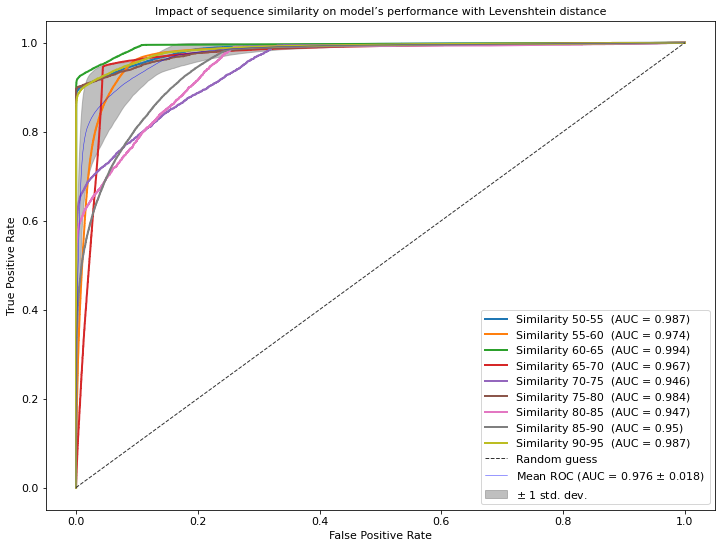

In [16]:
def cal_fpr_and_tpr_with_one_cutoff(y_true, y_prred, cutoff):
    tp = np.where(np.logical_and(y_prred >= cutoff, y_true == 1))[0]
    fp = np.where(np.logical_and(y_prred >= cutoff, y_true == 0))[0]
    tpr = len(tp)/len(y_true[y_true==1])
    fpr = len(fp)/len(y_true[y_true==0])
    return fpr,tpr
def cal_fpr_and_tpr_in_different_cutoffs(y_true, y_prred, cutoffs):
    fpr_in_different_cutoffs = []
    tpr_in_different_cutoffs = []
    for cutoff in cutoffs:
        fpr, tpr = cal_fpr_and_tpr_with_one_cutoff(y_true, y_prred, cutoff)
        fpr_in_different_cutoffs.append(fpr)
        tpr_in_different_cutoffs.append(tpr)
    return np.array(fpr_in_different_cutoffs), np.array(tpr_in_different_cutoffs)
def cal_fprs_and_tprs_in_different_sets(y_trues, y_preds, cutoffs):
    fprs_in_different_sets = []
    tprs_in_different_sets = []
    for y_true, y_pred in zip(y_trues, y_preds):
        fprs_in_a_set, tprs_in_a_set = cal_fpr_and_tpr_in_different_cutoffs(y_true, y_pred, cutoffs)
        fprs_in_different_sets.append(fprs_in_a_set)
        tprs_in_different_sets.append(tprs_in_a_set)
    fpr_mean = np.mean(fprs_in_different_sets, axis=0)
    tpr_mean = np.mean(tprs_in_different_sets, axis=0)
    tpr_std= np.std(tprs_in_different_sets, axis=0)
    return fprs_in_different_sets, tprs_in_different_sets
def draw_ROC_Curve(y_trues, y_preds, cutoffs):
    fprs_in_different_sets, tprs_in_different_sets = cal_fprs_and_tprs_in_different_sets(y_trues, y_preds, cutoffs)
    fpr_mean= np.mean(fprs_in_different_sets, axis=0)
    tpr_mean= np.mean(tprs_in_different_sets, axis=0)
    tpr_mean[-1] = 0.0
    tpr_std= np.std(tprs_in_different_sets, axis=0)
    tpr_upper= np.minimum(tpr_mean + tpr_std, 1)
    tpr_lower= np.maximum(tpr_mean - tpr_std, 0)
    fig, ax = plt.subplots(figsize=(12, 9))
    mean_auc = auc(fpr_mean, tpr_mean)
    std_auc = np.std(aucs)
    
    ax.plot(fpr01, tpr01, label = 'Similarity 50-55  (AUC = {0})'.format(round(auc_score01,3)),linewidth=2)
    ax.plot(fpr02, tpr02, label = 'Similarity 55-60  (AUC = {0})'.format(round(auc_score02,3)),linewidth=2)
    ax.plot(fpr03, tpr03, label = 'Similarity 60-65  (AUC = {0})'.format(round(auc_score03,3)),linewidth=2)
    ax.plot(fpr04, tpr04, label = 'Similarity 65-70  (AUC = {0})'.format(round(auc_score04,3)),linewidth=2)
    ax.plot(fpr05, tpr05, label = 'Similarity 70-75  (AUC = {0})'.format(round(auc_score05,3)),linewidth=2)
    ax.plot(fpr06, tpr06, label = 'Similarity 75-80  (AUC = {0})'.format(round(auc_score06,3)),linewidth=2)
    ax.plot(fpr07, tpr07, label = 'Similarity 80-85  (AUC = {0})'.format(round(auc_score07,3)),linewidth=2)
    ax.plot(fpr08, tpr08, label = 'Similarity 85-90  (AUC = {0})'.format(round(auc_score08,3)),linewidth=2)
    ax.plot(fpr09, tpr09, label = 'Similarity 90-95  (AUC = {0})'.format(round(auc_score09,3)),linewidth=2)
    # ax.plot(fpr10, tpr10, label = 'Similarity 95-100 ("AUC= {0})'.format(round(auc_score09,3)),linewidth=2)

    ax.plot([0, 1], [0, 1], linestyle="dashed", lw=1, color="k", label="Random guess", alpha=0.8)
    ax.plot(
        fpr_mean,
        tpr_mean,
        color="b",
        lw=0.5,
        label=r"Mean ROC (AUC = %0.3f $\pm$ %0.3f)" % (mean_auc, std_auc),
        alpha=0.8,
    )
    ax.fill_between(
        fpr_mean,
        tpr_lower,
        tpr_upper,
        color="grey",
        alpha=0.5,
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
    )
    ax.legend(loc="lower right")
    plt.title("Impact of sequence similarity on model’s performance with Levenshtein distance", fontsize=11)
    plt.xlabel("False Positive Rate", fontsize=11)
    plt.ylabel("True Positive Rate", fontsize=11)
    plt.rcParams.update({'font.size': 11})
    plt.savefig("../../analysis/figures/benchmark_simi_epitope.png", dpi=600)
    plt.savefig("../../analysis/figures/benchmark_simi_epitope.pdf", dpi=600)
    plt.show()
    
draw_ROC_Curve([y_test01,y_test02,y_test03,y_test04,y_test05,
                y_test06,y_test07,y_test08,y_test09],
               [prob01,prob02,prob03,prob04,prob05,
                prob06,prob07,prob08,prob09],np.linspace(0.0, 1.0, num=100))